# Air Quality Prediction

In [42]:
import numpy as np 
import pandas as pd

# Reading file

In [34]:
df=pd.read_csv(r"C:\Users\REAL\Documents\Datasets\CP2\air-quality-india.csv")

In [3]:
df.head(5)

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


## Checking for nulls and duplicates

In [36]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [41]:
df[df.duplicated()>0]

,Timestamp,Year,Month,Day,Hour,PM2.5


## Importing necessary libraries

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [7]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [8]:
df['Date']=df["Timestamp"].dt.date

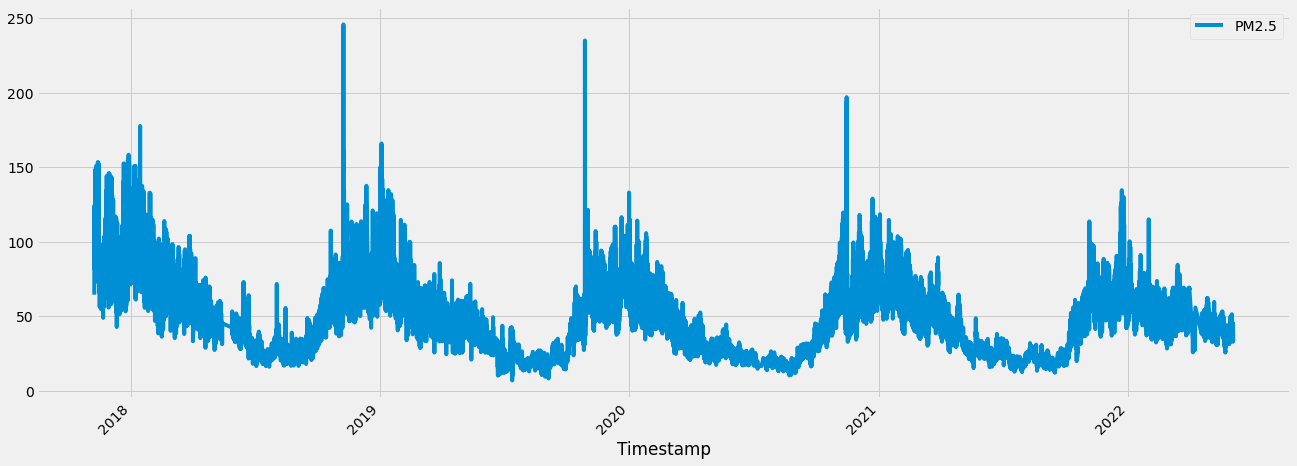

In [9]:
df.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

### Here the pattern is nearly repeating itself

<AxesSubplot:xlabel='Year'>

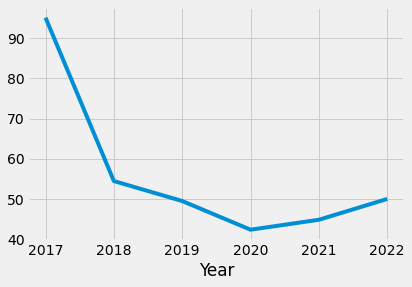

In [10]:
df.groupby('Year')['PM2.5'].mean().plot()

### We can see that 2017 has lowest PM 2.5 value and year 2020 has the lowest value

<AxesSubplot:xlabel='Year', ylabel='PM2.5'>

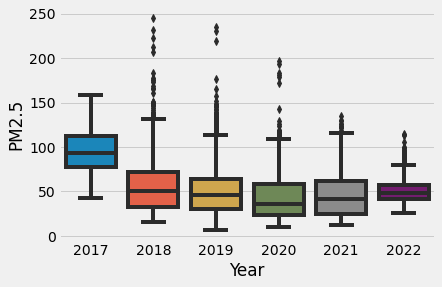

In [11]:
df_year=df.loc[:,['Year','PM2.5']]
sns.boxplot(x='Year', y='PM2.5',data=df_year)

<AxesSubplot:xlabel='Month'>

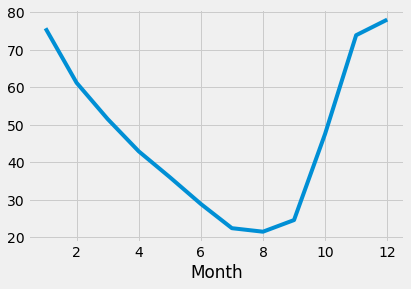

In [12]:
df.groupby('Month')['PM2.5'].mean().plot()

### The months January,November and December have peak value of PM2.5 which may be afected due to weather conditions or many other reasons.

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

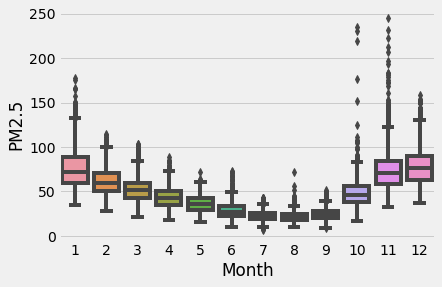

In [13]:
df_month=df.loc[:,['Month','PM2.5']]
sns.boxplot(x='Month', y='PM2.5',data=df_month)

<AxesSubplot:xlabel='Day'>

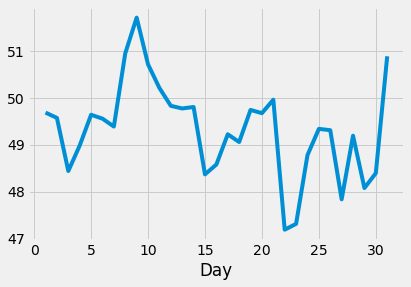

In [14]:
df.groupby('Day')['PM2.5'].mean().plot()

### Days in the month i.e. 9,10 have highest  index.

<AxesSubplot:xlabel='Day', ylabel='PM2.5'>

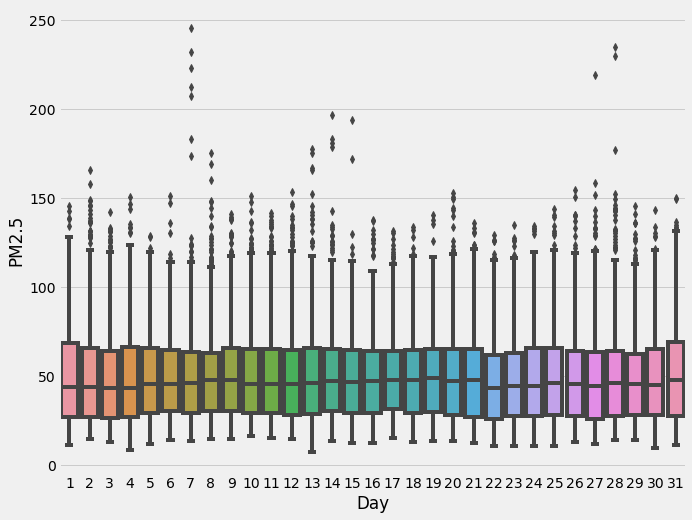

In [15]:
df_day=df.loc[:,['Day','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Day', y='PM2.5',data=df_day)

<AxesSubplot:xlabel='Hour'>

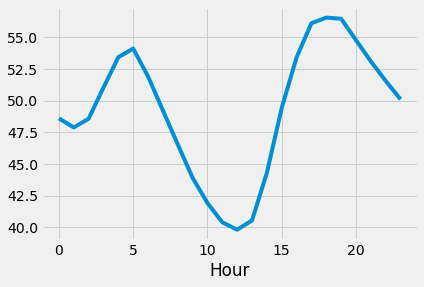

In [16]:
df.groupby('Hour')['PM2.5'].mean().plot()

### 18-20 hrs are the peak hours having highest index. It may be due to hot whether in the afternoon.

<AxesSubplot:xlabel='Hour', ylabel='PM2.5'>

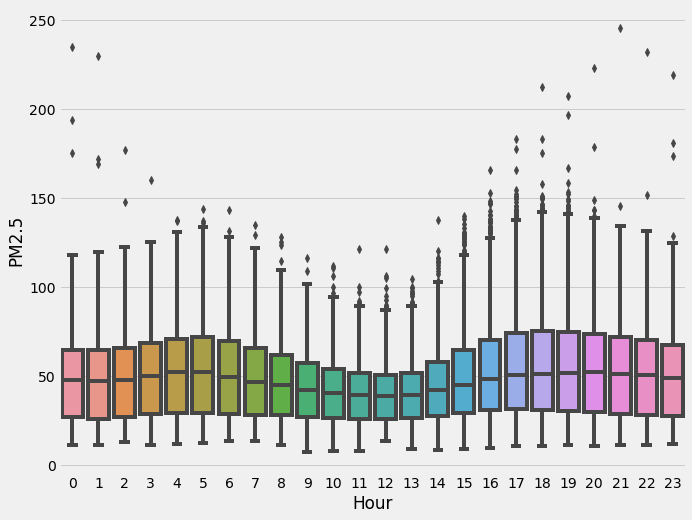

In [17]:
df_hour=df.loc[:,['Hour','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hour', y='PM2.5',data=df_hour)

In [18]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date

,PM2.5
Date,
2017-11-07,99.805833
2017-11-08,110.979565
2017-11-09,114.915833
2017-11-10,119.404091
2017-11-11,109.267273
...,...
2022-05-31,41.465417
2022-06-01,41.645833
2022-06-02,42.255417


<AxesSubplot:xlabel='Date'>

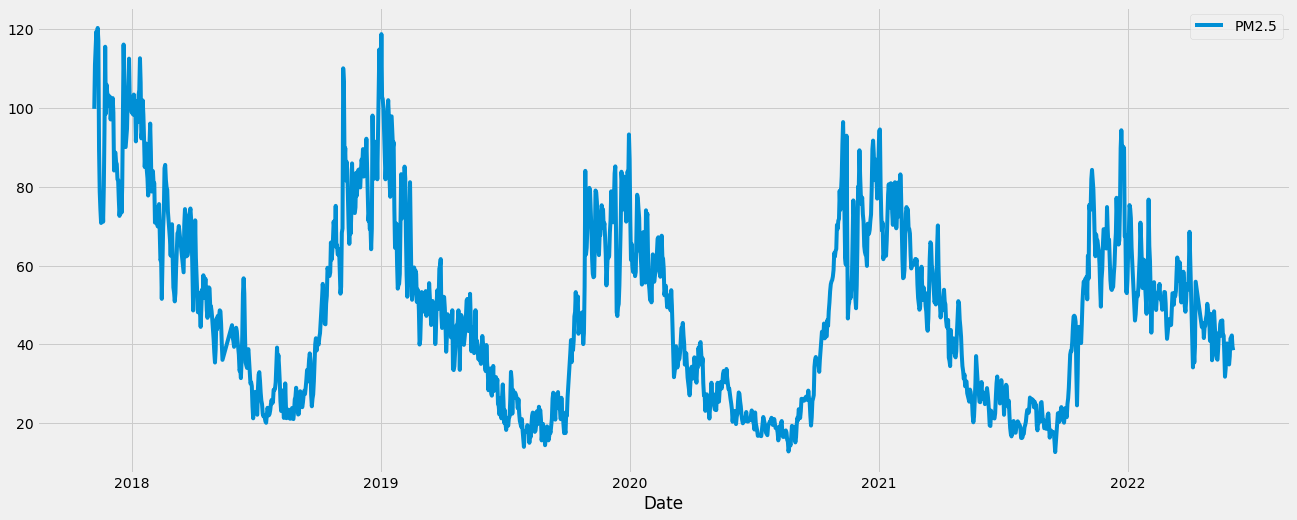

In [19]:
df_date.plot(figsize=(20,8))

In [20]:
dataset  = df_date.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1293

In [21]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.80924161],
       [0.91297267],
       [0.94951492],
       ...,
       [0.27497376],
       [0.24870153],
       [0.24014526]])

In [22]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1233, 60, 1)

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [26]:
model.fit(x_train,y_train, batch_size=32, epochs=5)

Epoch 1/5
39/39 [==============================] - 16s 82ms/step - loss: 0.0195
Epoch 2/5
39/39 [==============================] - 3s 82ms/step - loss: 0.0065
Epoch 3/5
39/39 [==============================] - 3s 84ms/step - loss: 0.0060
Epoch 4/5
39/39 [==============================] - 3s 82ms/step - loss: 0.0058
Epoch 5/5
39/39 [==============================] - 3s 81ms/step - loss: 0.0062


In [27]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [28]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

11/11 [==============================] - 3s 31ms/step


In [48]:
mse = mean_squared_error(df_date.iloc[training_data_len:, 0], predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 58.42043289962208


In [49]:
mae = mean_absolute_error(df_date.iloc[training_data_len:, 0], predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 5.669767106894851


In [47]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.4082032969085623

In [31]:
train = df_date[:training_data_len]
valid = df_date[training_data_len:]
valid["Predictions"] = predictions
valid

,PM2.5,Predictions
Date,,
2021-06-28,28.667917,28.446533
2021-06-29,30.903750,28.762094
2021-06-30,29.017917,29.217386
2021-07-01,27.166667,29.604044
2021-07-02,27.132917,29.812553
...,...,...
2022-05-31,41.465417,39.665722
2022-06-01,41.645833,39.690273
2022-06-02,42.255417,39.935310


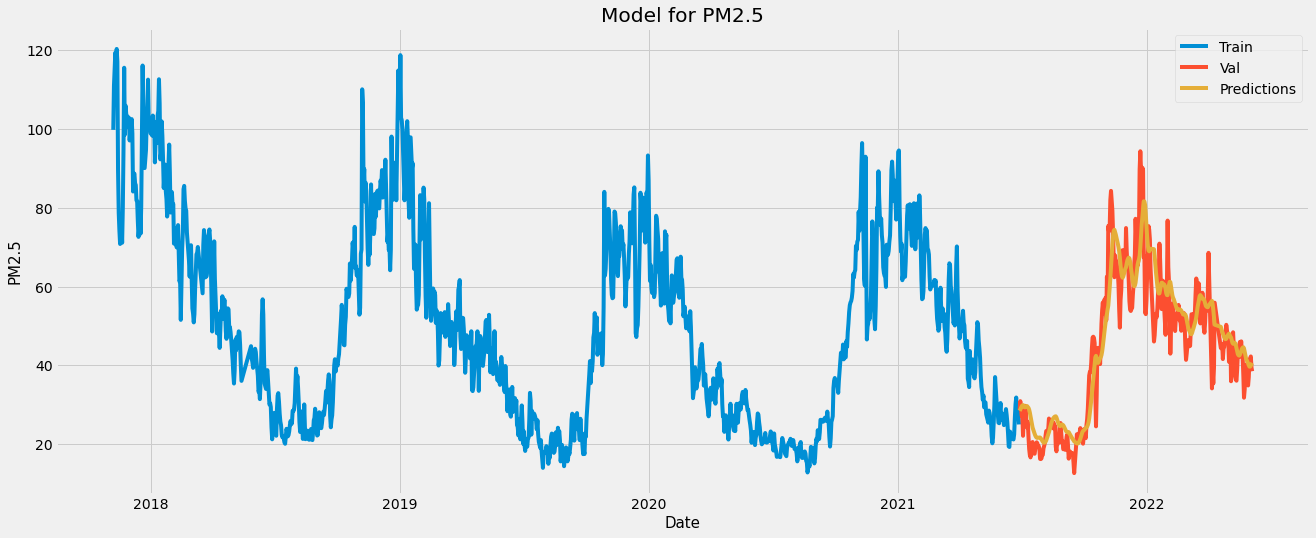

In [32]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[df_date.columns])
plt.plot(valid['PM2.5'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])